### Importing libraries

In [1]:
import pandas as pd                 #importing library for data exploration
import matplotlib.pyplot as plt    # library for data visualization
import numpy as ny       # library for some computations
from IPython.display import  Latex
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
import statsmodels.api as sm # import ordinary least square
from sklearn.svm import SVR # import support vector regression
from sklearn.svm import SVC # import support vector regression

### Uploading and reading data

In [100]:
train_df=pd.read_csv("Train.csv")   #uploading the data
train_df.head(n=2)                     #reading the data (the five first rows)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652


In [16]:
train_df.shape     # checking the size of the data

(30557, 82)

##### Number of rows or observations = 30557
##### Number of columns or variables = 82

### Counting unique entries in each column

In [17]:
def uniq_value(train_df):
    # counting unique values per column
    for column in train_df.columns:
        print(column + ":"+ str((train_df[column].nunique()*100)/30557)[:4]+ "%")
uniq_value(train_df)

Place_ID X Date:100.%
Date:0.30%
Place_ID:1.11%
target:1.22%
target_min:0.88%
target_max:2.35%
target_variance:96.9%
target_count:2.82%
precipitable_water_entire_atmosphere:41.3%
relative_humidity_2m_above_ground:36.9%
specific_humidity_2m_above_ground:70.0%
temperature_2m_above_ground:96.4%
u_component_of_wind_10m_above_ground:92.4%
v_component_of_wind_10m_above_ground:92.5%
L3_NO2_NO2_column_number_density:84.2%
L3_NO2_NO2_slant_column_number_density:84.2%
L3_NO2_absorbing_aerosol_index:84.2%
L3_NO2_cloud_fraction:83.2%
L3_NO2_sensor_altitude:84.2%
L3_NO2_sensor_azimuth_angle:84.2%
L3_NO2_sensor_zenith_angle:84.2%
L3_NO2_solar_azimuth_angle:84.2%
L3_NO2_solar_zenith_angle:84.2%
L3_NO2_stratospheric_NO2_column_number_density:84.2%
L3_NO2_tropopause_pressure:66.6%
L3_NO2_tropospheric_NO2_column_number_density:63.0%
L3_O3_O3_column_number_density:96.9%
L3_O3_O3_effective_temperature:96.9%
L3_O3_cloud_fraction:92.1%
L3_O3_sensor_azimuth_angle:96.9%
L3_O3_sensor_zenith_angle:96.9%
L3_O3_s

##### Number of cities where the data was collected =340 cities
##### The data was collected in a periode of 94 days (3 months)
##### All the variables have duplicate entries except the variable "Place_ID X Date" because it number of unique values is equal to the number of observations of the hold dataset. The next step is to set that variable as the index. The table also show that
##### Composantes containing AER-AI,and composantes with cloud sensor or cloud solar almost always changing over the time with a variability up to 99% of unique recordings seen.
##### Wind and composanses containing O3 have also a high variability over the time with around 92% unique recordings for wind and 96% unique recordings for composantes with O3.
##### Composantes with CO and composante with NO2 (except L3-NO2-TROPOPAUSE PRESSURE and L3-NO2 TROPOSPHERIC-NO2 COLUMN NUMBER DENSITY) have a high variability over the time with around 83% unique recordings.
##### Composantes with HCHO and composantes with SO2 have around 74% unique recordings over the time.
####
##### Composantes with CH4 are very stationary with only 9% unique recordings over the time.
##### Specific humidity at 2m above the ground have higher variability (70% unique recordings)than relative humidity at 2m above the ground (36% unique recordings). When precipitable water in the entire atmosphere has 40% unique recordings over the time.

### Setting index

In [101]:
def set_index(train_df):
    train_df=train_df.set_index("Place_ID X Date")# set the "Place_ID X Date" column as the index
    return train_df
train_df=set_index(train_df)
train_df

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
Place_ID X Date,,,,,,,,,,,,,,,,,,,,,
010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,0.00352,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,0.00341,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,0.00356,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking most relevant features

In [19]:
def correlation(train_df):
    best_features=train_df.corr()["target"]
    #checking correlation
    best_feature=[]
    for column_name, value in best_features.iteritems():
        if value <=-0.3 or value >0.3:

            best_feature.append(column_name)
    print("Number of features with the correlation less than -o.3 or greater than 0.3  =" + str(len(best_feature)))
    print("Those variables are:" ,best_feature)
    return best_features
correlation(train_df)

Number of features with the correlation less than -o.3 or greater than 0.3  =9
Those variables are: ['target', 'target_min', 'target_max', 'L3_NO2_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 'L3_CO_CO_column_number_density', 'L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_AER_AI_sensor_altitude']


target                          1.000000
target_min                      0.818803
target_max                      0.630801
target_variance                 0.184818
target_count                    0.094135
                                  ...   
L3_CH4_aerosol_optical_depth    0.086445
L3_CH4_sensor_azimuth_angle     0.012264
L3_CH4_sensor_zenith_angle      0.031025
L3_CH4_solar_azimuth_angle     -0.118004
L3_CH4_solar_zenith_angle       0.043264
Name: target, Length: 79, dtype: float64

##### The above code shows that, with a correlation coefficient in $(-\infty, -0.3] \cup [0.3,+ \infty)$, we have only 8 features.
##### So there is a very weak correlation between all the features and the output variable.

### Filtering the city with the highest recorded minimum concentration of the particule PM2.5 matter  

In [20]:
def min_PM25_concentration(train_df):
    min_target=train_df["target"].min()   # getting the global minimum target value
    print(min_target)
    train_df[train_df["target"]==min_target]   # visualizing data with the minimum target value registred
    print(train_df[train_df["target"]==min_target].shape) # checking how many time the minimum target value was recorded
    train_df[(train_df["target"]==min_target) & (train_df["Place_ID"]=="J3C3IAI")].shape  # filtering the city with the highest
min_PM25_concentration(train_df)

1.0
(41, 81)


##### The global minimum target recorded is 1.0 and that was recorded in four different cities namely: "J3C3IAI", "426FKUG", "1VNOK1S", and "L17089H". We can also notice that most of them was recorded on February.
##### The city "J3C3IAI" has the highest amont of minimum target recorded with 36 recordings over 41 recordings at a global scale.

### Filtering the city with the highest recorded maximum concentration of the particule PM2.5 matter  

In [21]:
def max_PM25_concentration(train_df):
    max_target=train_df["target"].max()   # getting the global minimum target value
    print(max_target)
    train_df[train_df["target"]==max_target]   # visualizing data with the minimum target value registred
max_PM25_concentration(train_df)

815.0


##### The global maximum target recorded is 815.0 and that was recorded four times in only one city namely: "426FKUG". We can also notice that all of them was recorded on February.

In [22]:
train_df.index.name

'Place_ID X Date'

### Visualizing the changing of the concentration of PM2.5 particule matter each month accross two cities (city where the minimum concentration of PM2.5 particule matter was recorded and city where the maximum concentration of PM2.5 particule matter was recorded)

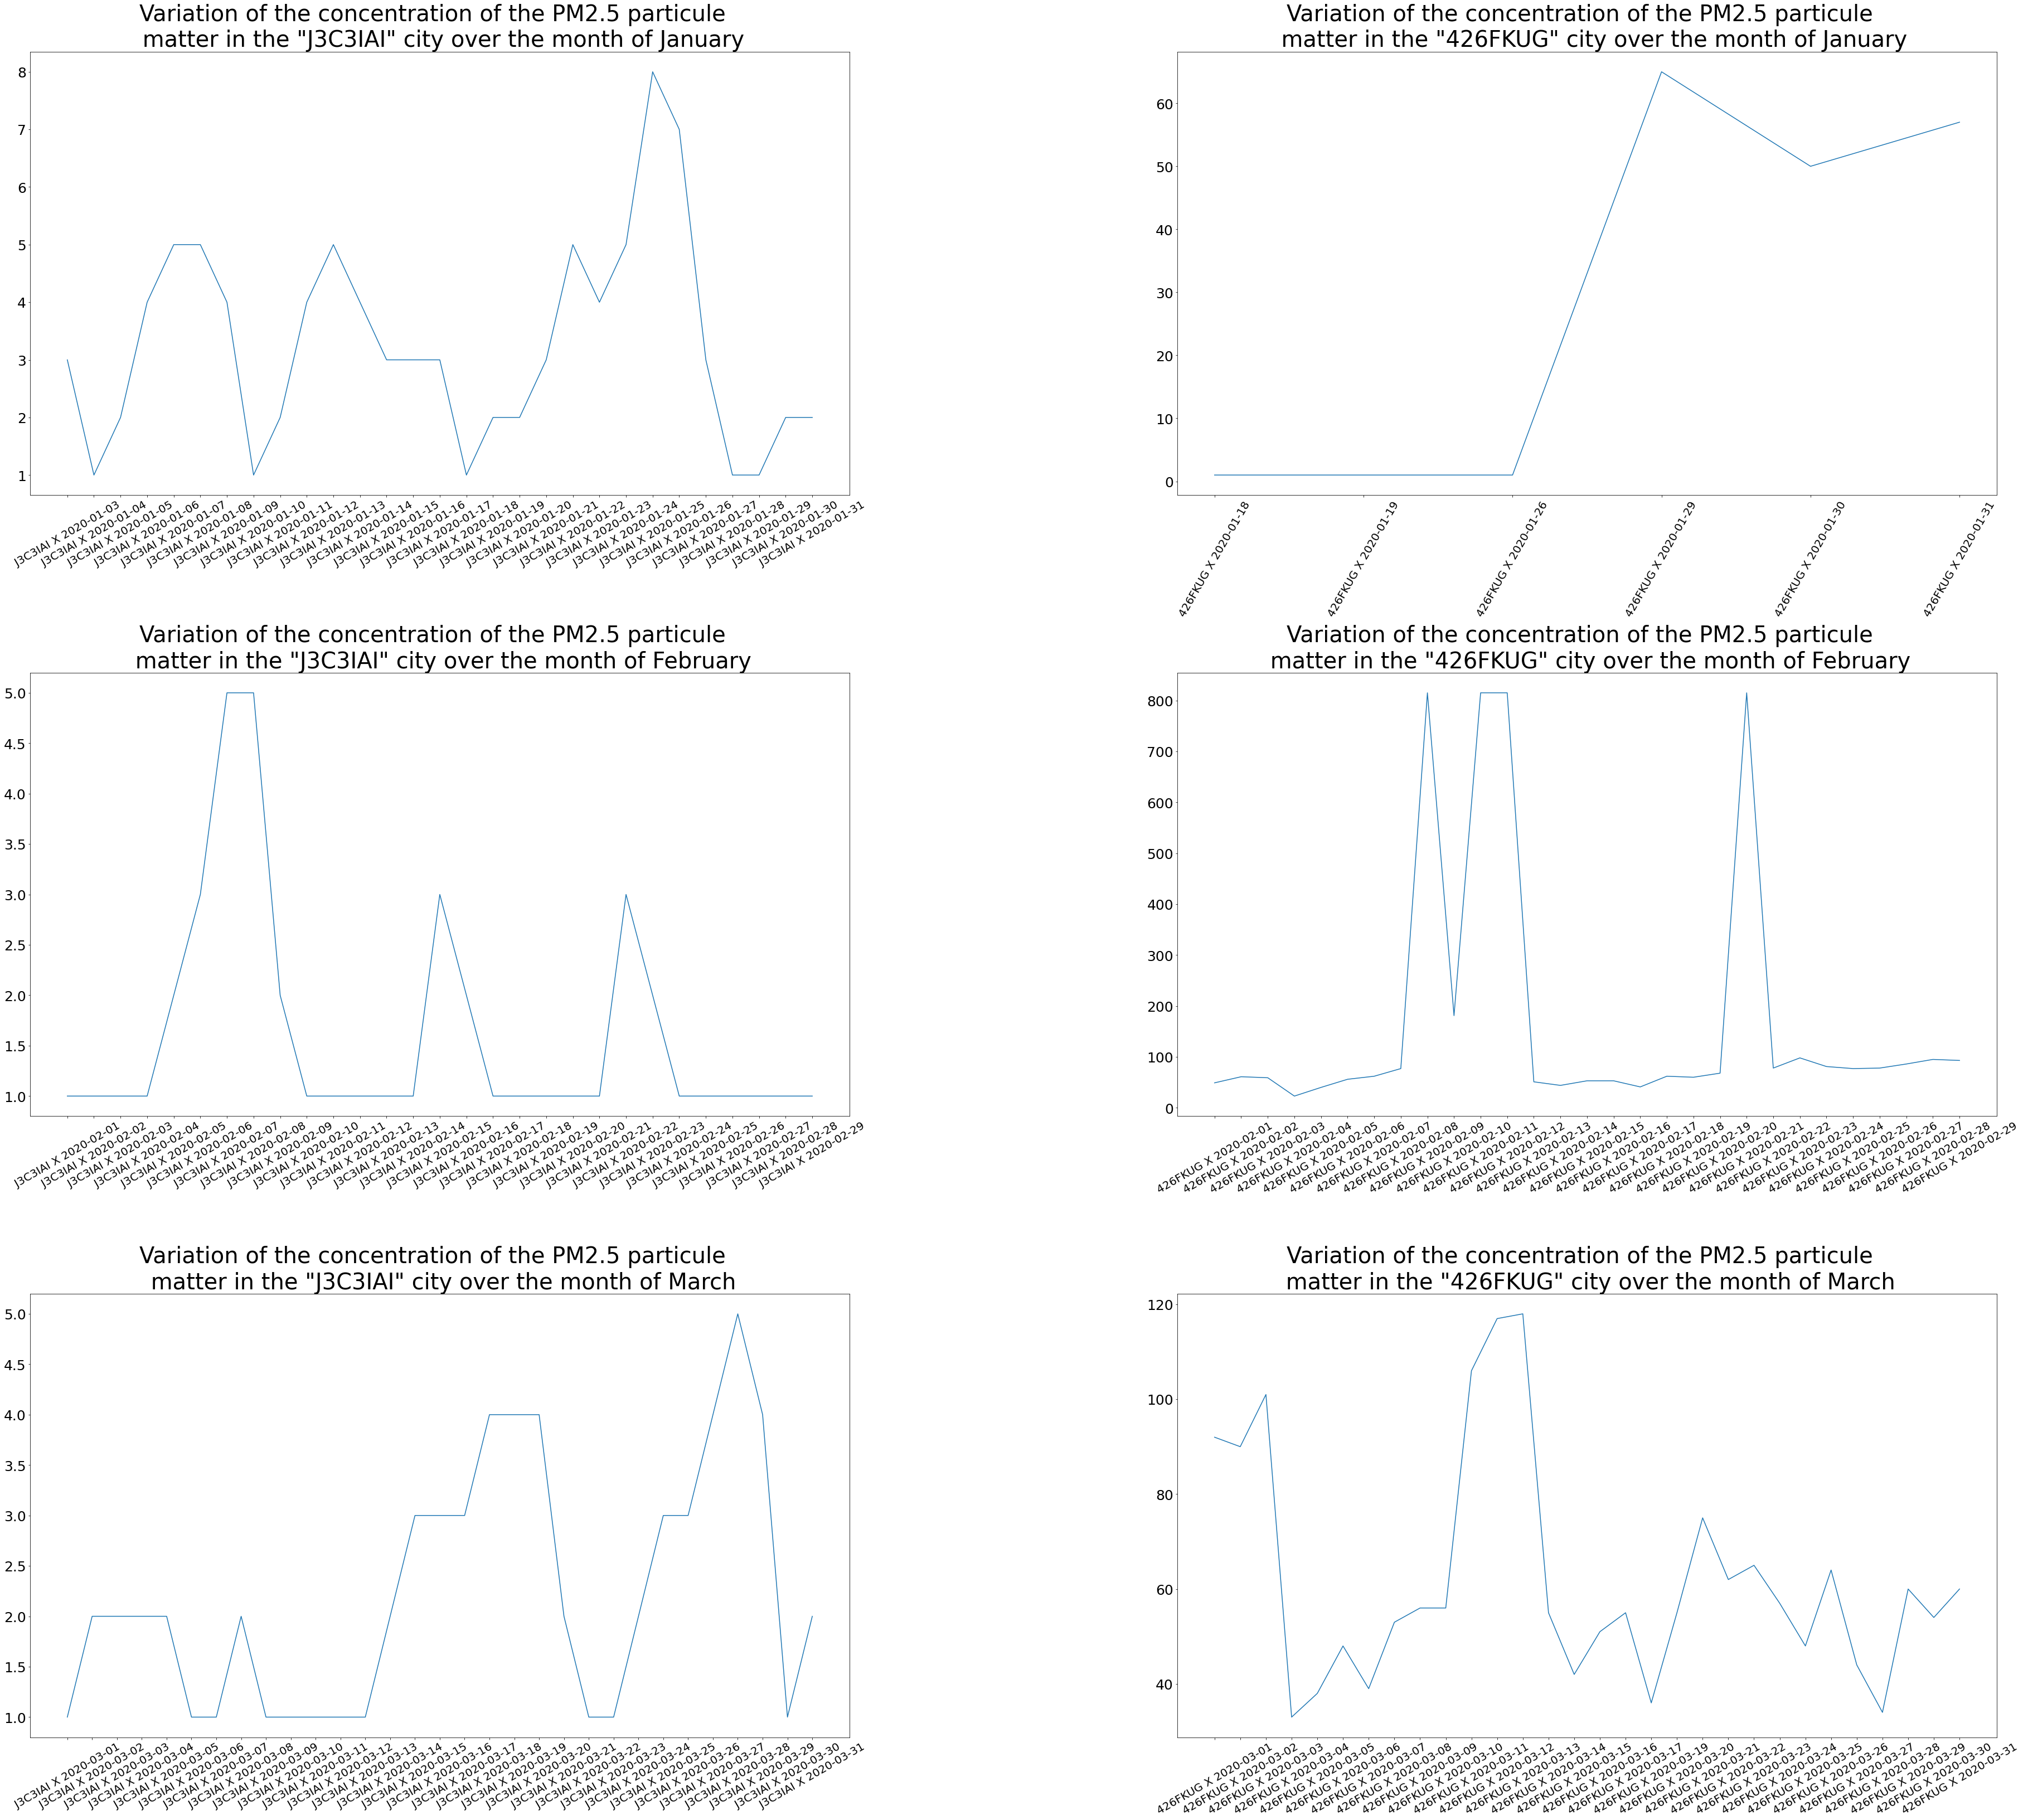

In [23]:
def plot_PM25_vs_citie(train_df):
    train_df['Date'] = pd.to_datetime(train_df['Date'])  # convert "Date" variable to datetime

#filtering dataframe per month and per city
    City_with_min_target_j = train_df[(train_df['Date'].dt.month == 1)&(train_df['Place_ID']=="J3C3IAI")]
    City_with_min_target_F = train_df[(train_df['Date'].dt.month == 2)&(train_df['Place_ID']=="J3C3IAI")]
    City_with_min_target_M = train_df[(train_df['Date'].dt.month == 3)&(train_df['Place_ID']=="J3C3IAI")]
    City_with_max_target_j = train_df[(train_df['Date'].dt.month == 1)&(train_df['Place_ID']=="426FKUG")]
    City_with_max_target_F = train_df[(train_df['Date'].dt.month == 2)&(train_df['Place_ID']=="426FKUG")]
    City_with_max_target_M = train_df[(train_df['Date'].dt.month == 3)&(train_df['Place_ID']=="426FKUG")]
# making subplots objects
    fig, ax = plt.subplots(3, 2,figsize=(10,140))

# drawing each subplot
    ax[0][0].plot(City_with_min_target_j.index,City_with_min_target_j["target"] )
    ax[0][1].plot(City_with_max_target_j.index, City_with_max_target_j["target"])
    ax[1][0].plot(City_with_min_target_F.index, City_with_min_target_F["target"])
    ax[1][1].plot(City_with_max_target_F.index, City_with_max_target_F["target"])
    ax[2][0].plot(City_with_min_target_M.index,City_with_min_target_M["target"] )
    ax[2][1].plot(City_with_max_target_M.index, City_with_max_target_M["target"])

#adjusting subplots position
    plt.subplots_adjust(left=0.1,
                        bottom=0.6, 
                        right=5, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

# rotating x-axis labels for each subplot to make them more readable
    ax[0][0].tick_params(axis='x', rotation=30)
    ax[0][1].tick_params(axis='x', rotation=60)
    ax[1][0].tick_params(axis='x', rotation=30)
    ax[1][1].tick_params(axis='x', rotation=30)
    ax[2][0].tick_params(axis='x', rotation=30)
    ax[2][1].tick_params(axis='x', rotation=30)

#increasing x-axis labels size for each subplot
    ax[0][0].tick_params(axis='x', labelsize=20)
    ax[0][1].tick_params(axis='x', labelsize=20)
    ax[1][0].tick_params(axis='x', labelsize=20)
    ax[1][1].tick_params(axis='x', labelsize=20)
    ax[2][0].tick_params(axis='x', labelsize=20)
    ax[2][1].tick_params(axis='x', labelsize=20)

#increasing y-axis labels size for each subplot
    ax[0][0].tick_params(axis='y', labelsize=25)
    ax[0][1].tick_params(axis='y', labelsize=25)
    ax[1][0].tick_params(axis='y', labelsize=25)
    ax[1][1].tick_params(axis='y', labelsize=25)
    ax[2][0].tick_params(axis='y', labelsize=25)
    ax[2][1].tick_params(axis='y', labelsize=25)

#setting titles for each subplot
    ax[0][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in the "J3C3IAI" city over the month of January',fontsize=40)
    ax[0][1].set_title('Variation of the concentration of the PM2.5 particule  \n  matter in the "426FKUG" city over the month of January',fontsize=40)
    ax[1][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in the "J3C3IAI" city over the month of February',fontsize=40)
    ax[1][1].set_title('Variation of the concentration of the PM2.5 particule  \n matter in the "426FKUG" city over the month of February',fontsize=40)
    ax[2][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in the "J3C3IAI" city over the month of March',fontsize=40)
    ax[2][1].set_title('Variation of the concentration of the PM2.5 particule  \n matter in the "426FKUG" city over the month of March',fontsize=40)

    plt.show()
plot_PM25_vs_citie(train_df)

##### The plots above show a variability but with a very low concentration of the PM2.5 particule matter with a pick of 8 over the month of January in the J3C3IAI city's. When in the 426FKUG city, we observe a drastic increasing from 24-01-2020 to 27-01-2020 with a pick of 60.
##### On February, the city J3C3IAI has less variability of the concentration of the PM2.5 particule matter but the pick remains almost the same compare to January. When we observe a drastic increasing of the concentration of the PM2.5 particule matter in the 426FKUG city where the pick changed from 60 on January to around 800 on February.
##### We observe almost the sane phenomenom on March in the J3C3IAI city and we see a drastic decreasing of the concentration of the PM2.5 particule matter in the 426FKUG city's.
####
##### In conclusion, we can say that the J3C3IAI city's seems to be more stable regarding air pollution than the 426FKUG city's.

### Visualizing the most unstable variables over the time

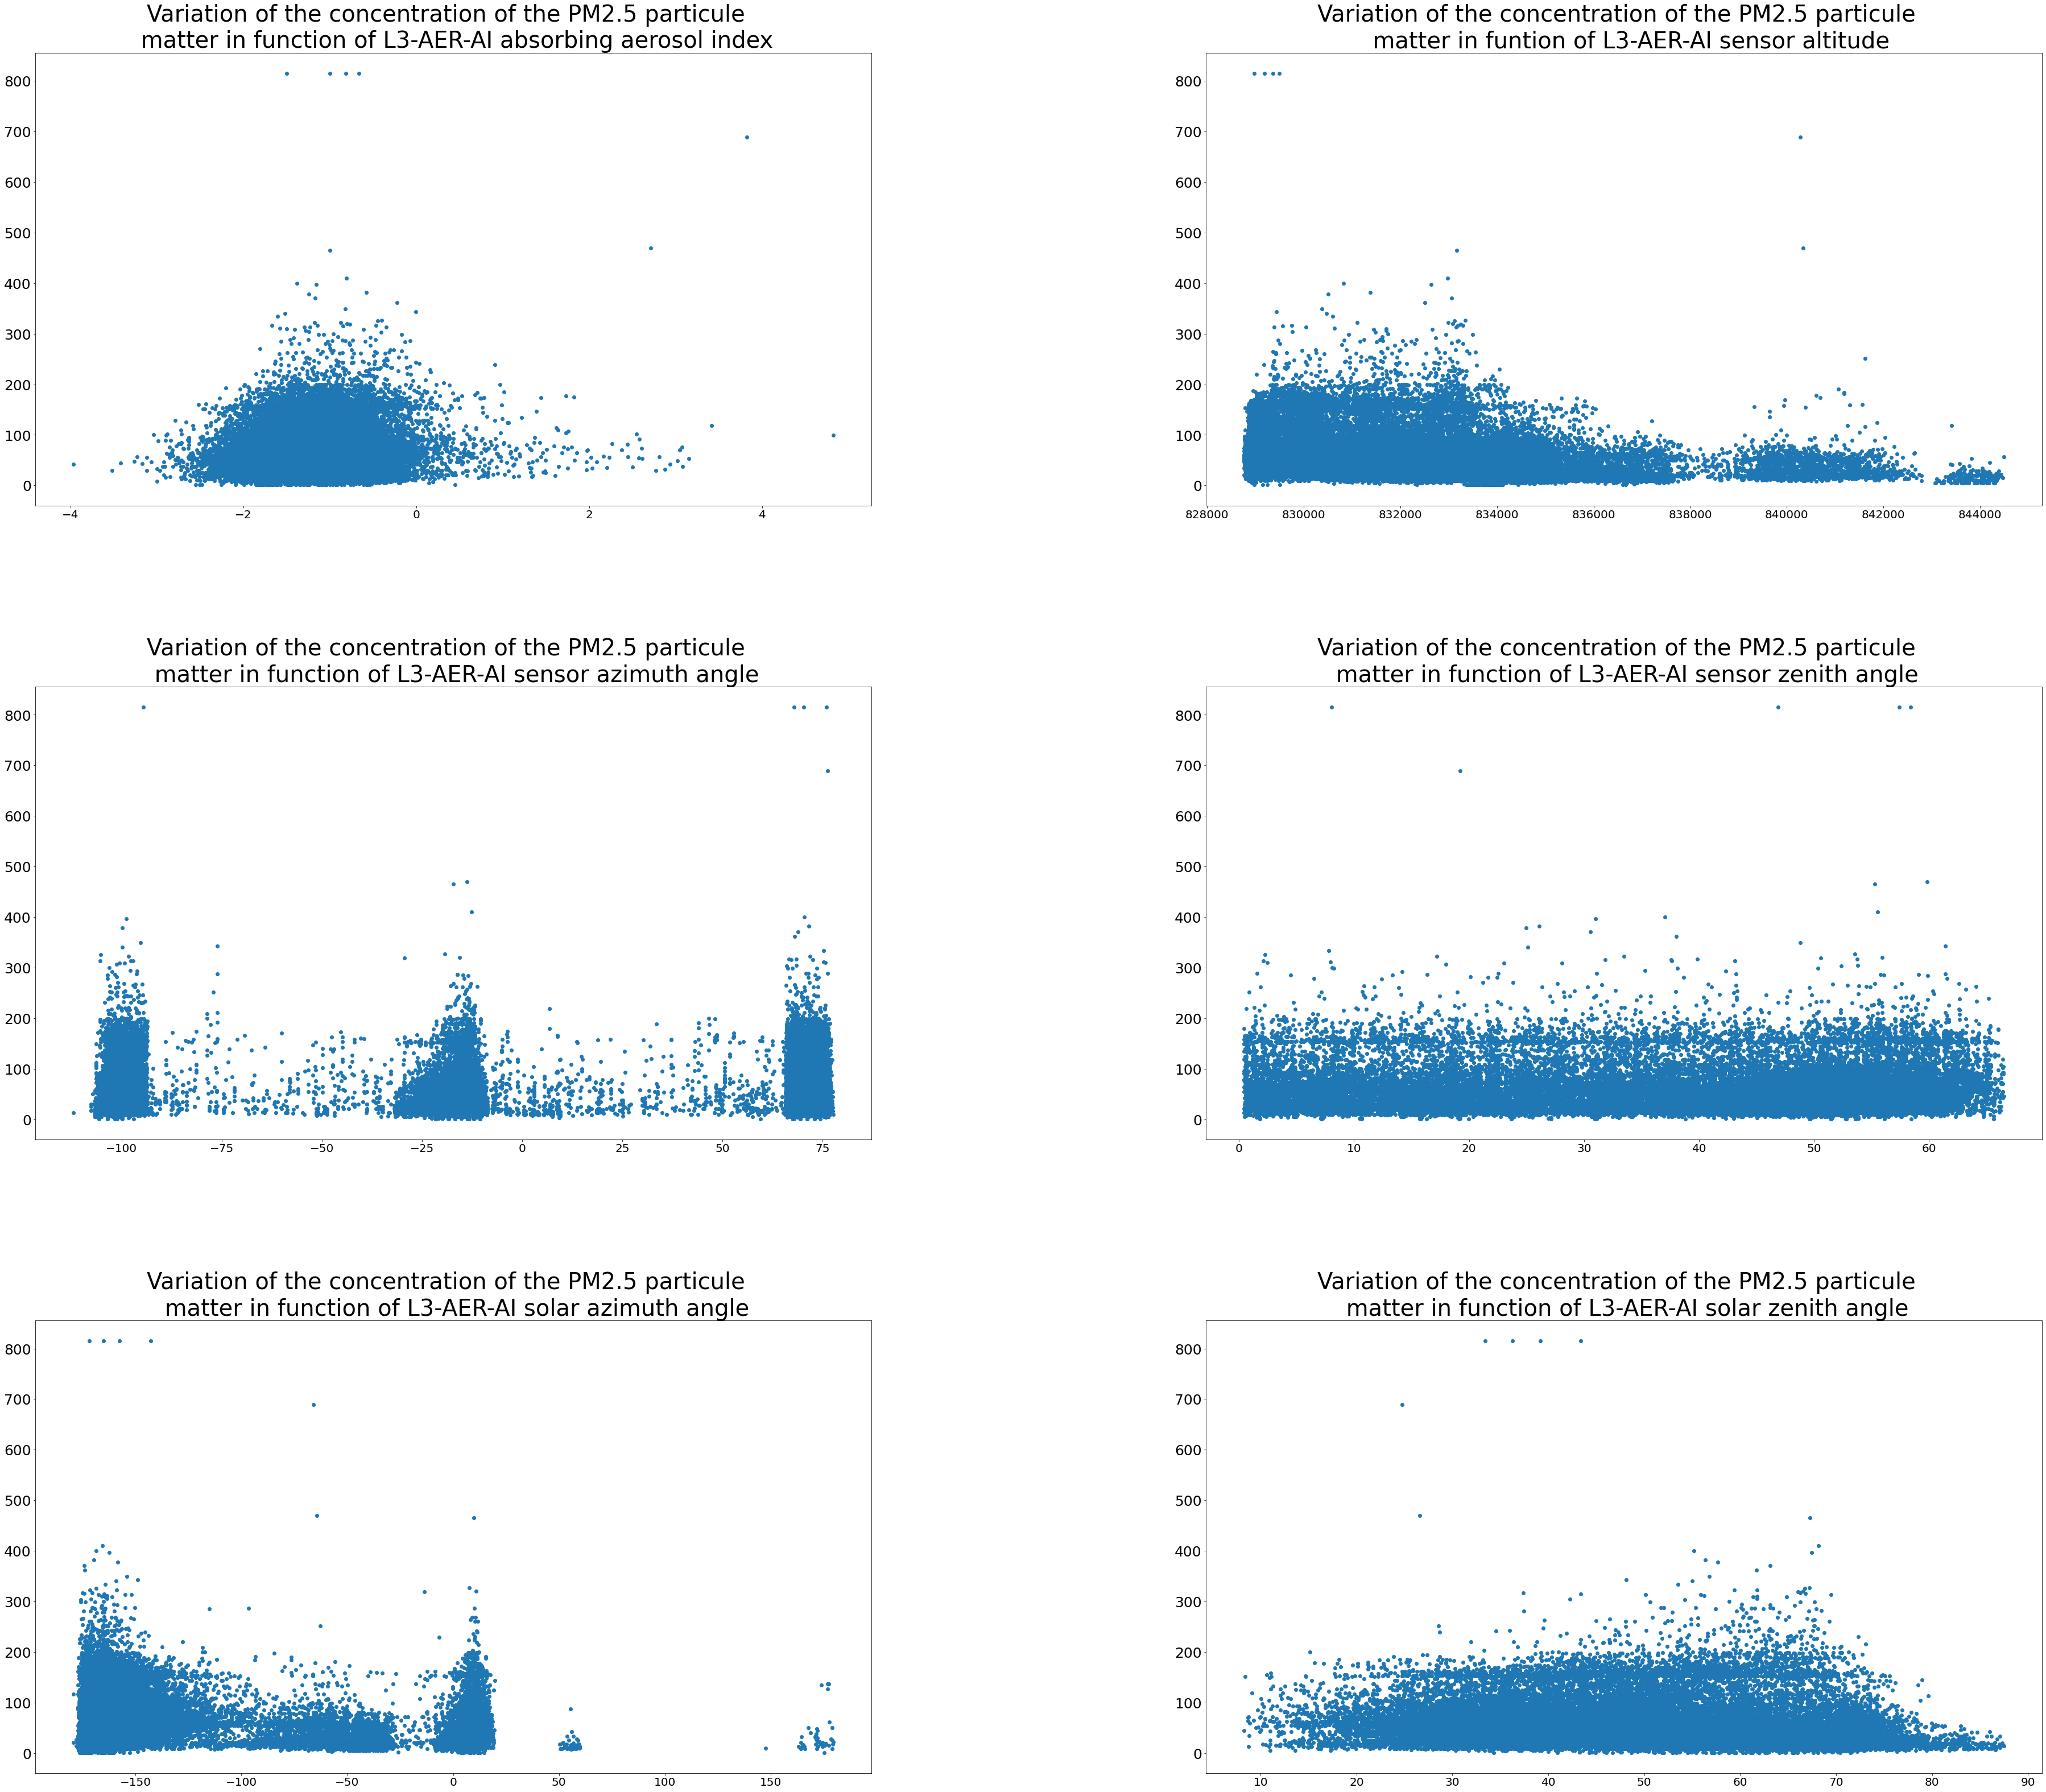

In [24]:
def scatter_plot_PM25_vs_AER_AI(train_df):
# making subplots objects
    fig, ax = plt.subplots(3, 2,figsize=(10,140))

# drawing each subplot
    ax[0][0].scatter(train_df["L3_AER_AI_absorbing_aerosol_index"],train_df["target"] )
    ax[0][1].scatter(train_df["L3_AER_AI_sensor_altitude"], train_df["target"])
    ax[1][0].scatter(train_df["L3_AER_AI_sensor_azimuth_angle"], train_df["target"])
    ax[1][1].scatter(train_df["L3_AER_AI_sensor_zenith_angle"], train_df["target"])
    ax[2][0].scatter(train_df["L3_AER_AI_solar_azimuth_angle"],train_df["target"] )
    ax[2][1].scatter(train_df["L3_AER_AI_solar_zenith_angle"], train_df["target"])

#adjusting subplots position
    plt.subplots_adjust(left=0.1,
                        bottom=0.6, 
                        right=5, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

#increasing x-axis labels size for each subplot
    ax[0][0].tick_params(axis='x', labelsize=20)
    ax[0][1].tick_params(axis='x', labelsize=20)
    ax[1][0].tick_params(axis='x', labelsize=20)
    ax[1][1].tick_params(axis='x', labelsize=20)
    ax[2][0].tick_params(axis='x', labelsize=20)
    ax[2][1].tick_params(axis='x', labelsize=20)

#increasing y-axis labels size for each subplot
    ax[0][0].tick_params(axis='y', labelsize=25)
    ax[0][1].tick_params(axis='y', labelsize=25)
    ax[1][0].tick_params(axis='y', labelsize=25)
    ax[1][1].tick_params(axis='y', labelsize=25)
    ax[2][0].tick_params(axis='y', labelsize=25)
    ax[2][1].tick_params(axis='y', labelsize=25)

#setting titles for each subplot
    ax[0][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3-AER-AI absorbing aerosol index',fontsize=40)
    ax[0][1].set_title('Variation of the concentration of the PM2.5 particule  \n  matter in funtion of L3-AER-AI sensor altitude',fontsize=40)
    ax[1][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3-AER-AI sensor azimuth angle',fontsize=40)
    ax[1][1].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3-AER-AI sensor zenith angle',fontsize=40)
    ax[2][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3-AER-AI solar azimuth angle',fontsize=40)
    ax[2][1].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3-AER-AI solar zenith angle',fontsize=40)
    
scatter_plot_PM25_vs_AER_AI(train_df)

### Visualizing the most stable variables over the time

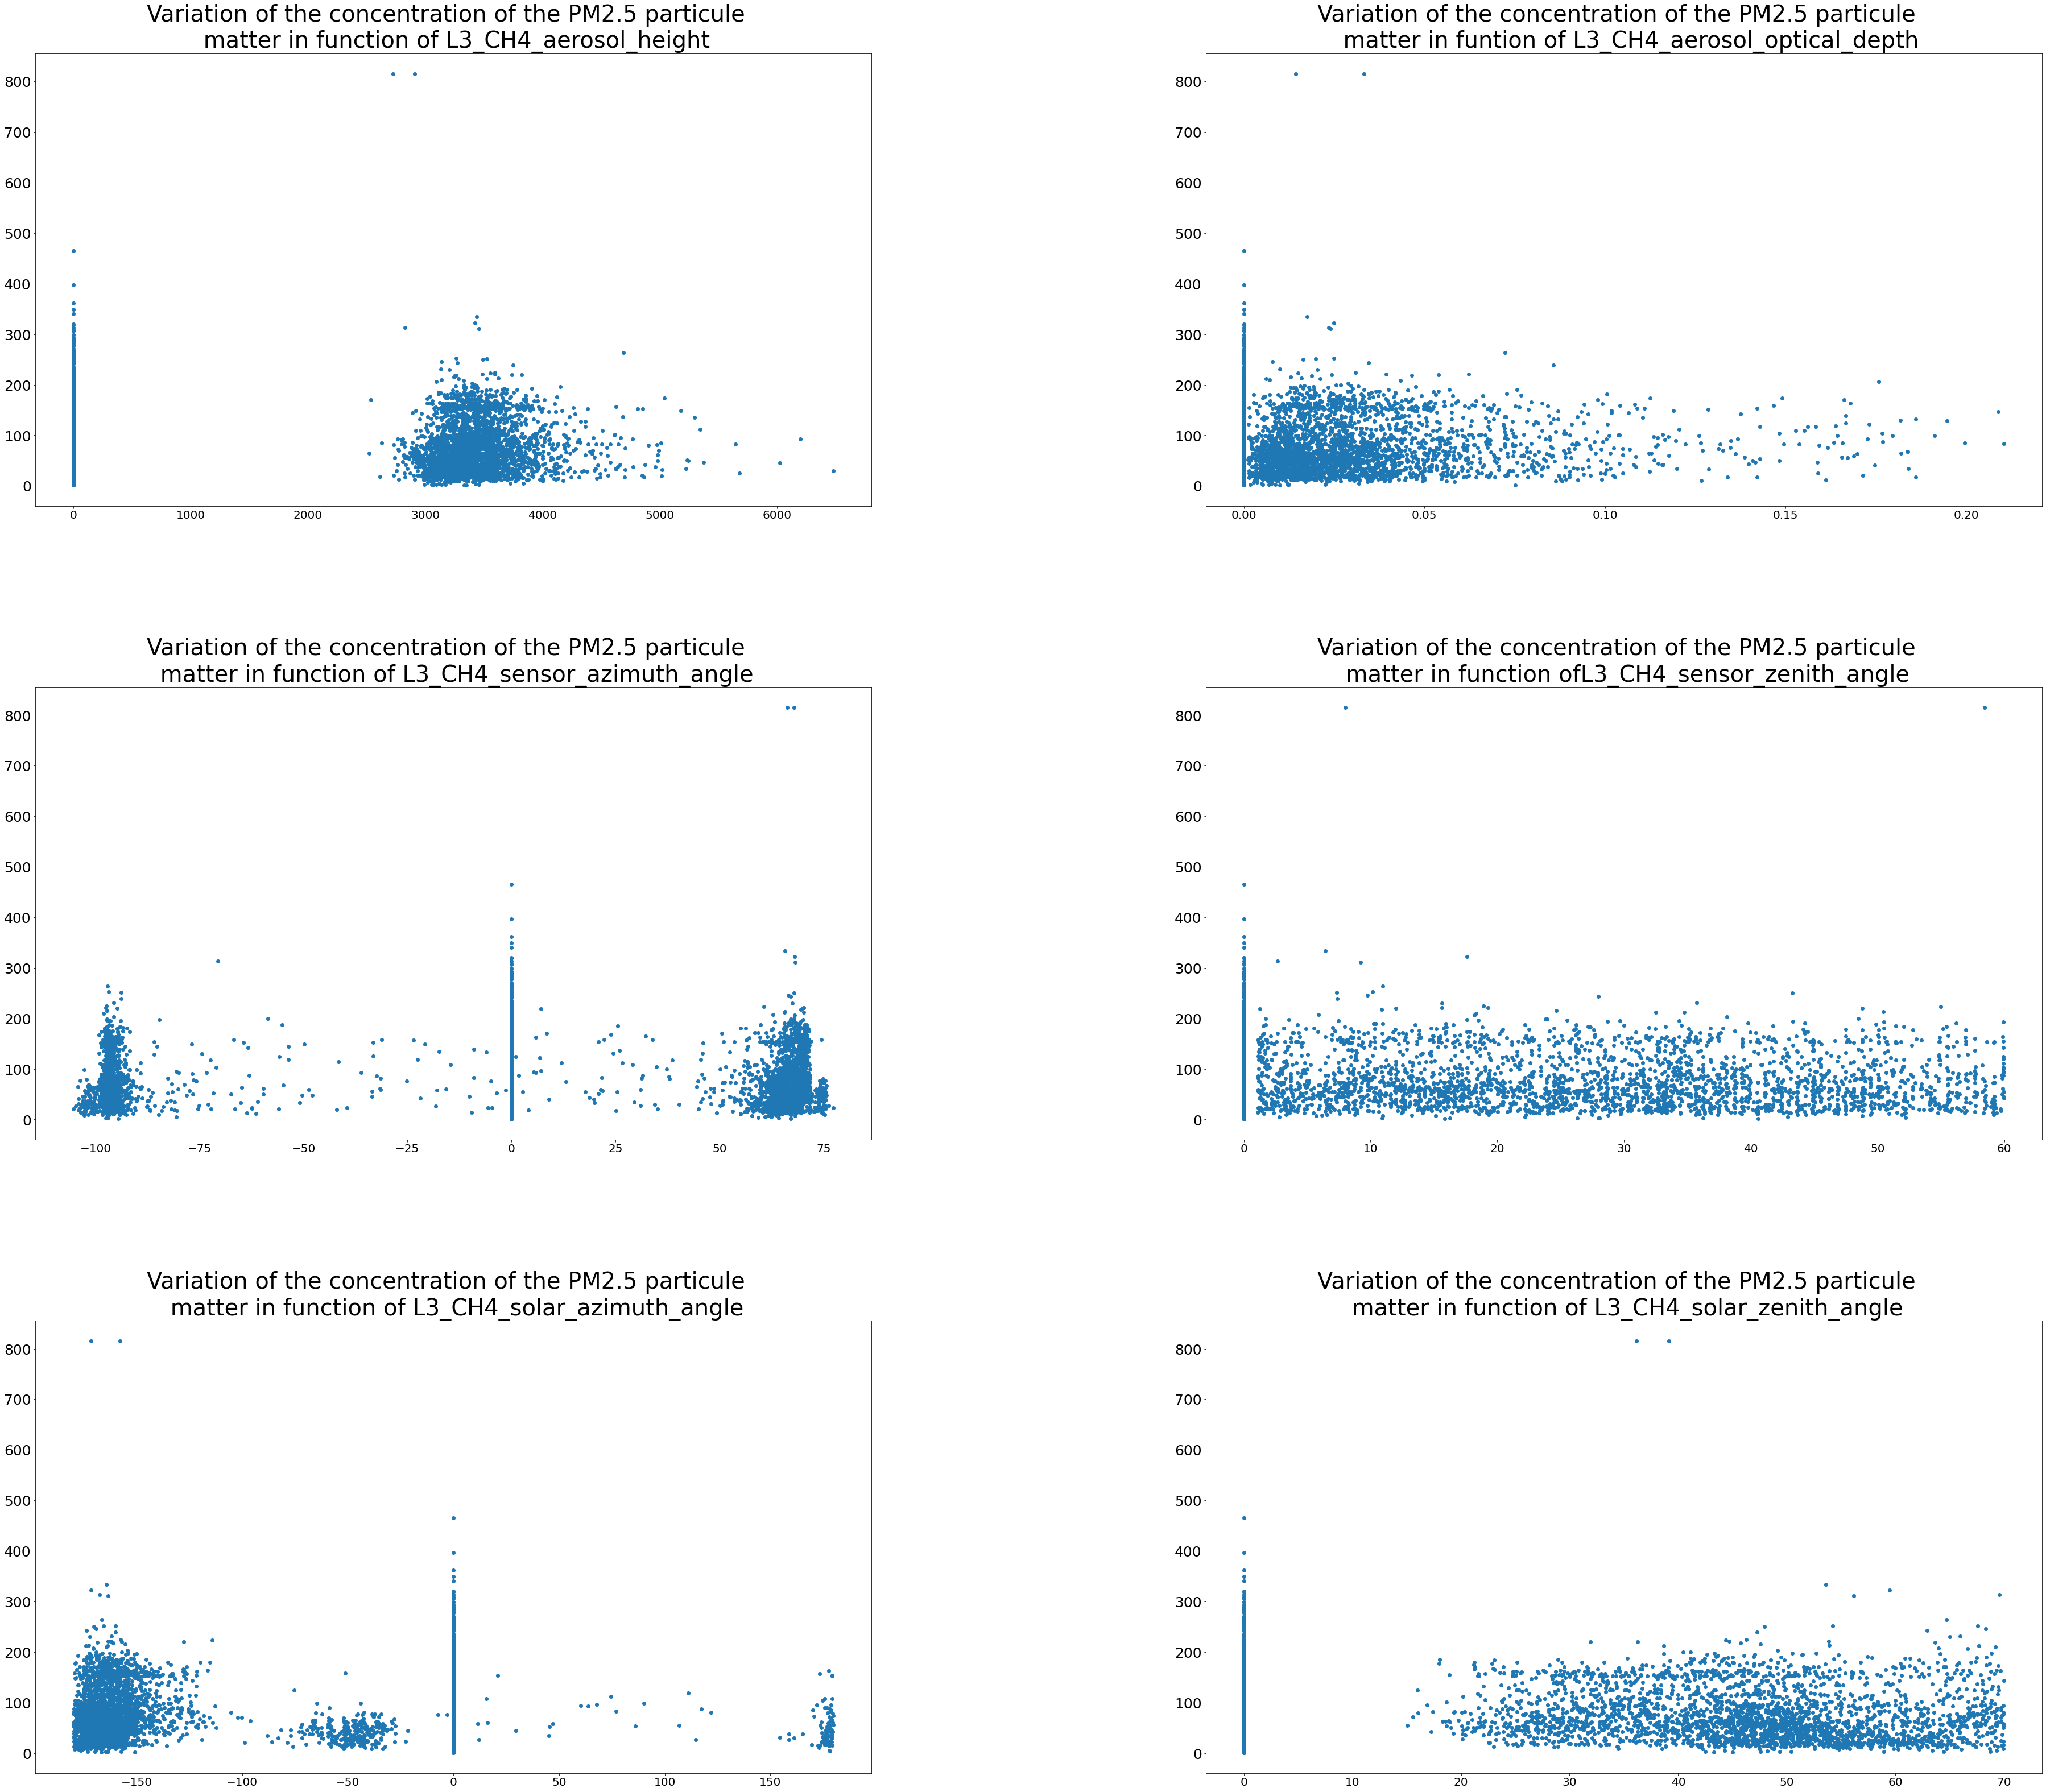

In [25]:
def scatter_plot_PM25_vs_CH4(train_df):
# making subplots objects
    fig, ax = plt.subplots(3, 2,figsize=(10,140))

# drawing each subplot
    ax[0][0].scatter(train_df["L3_CH4_aerosol_height"],train_df["target"] )
    ax[0][1].scatter(train_df["L3_CH4_aerosol_optical_depth"], train_df["target"])
    ax[1][0].scatter(train_df["L3_CH4_sensor_azimuth_angle"], train_df["target"])
    ax[1][1].scatter(train_df["L3_CH4_sensor_zenith_angle"], train_df["target"])
    ax[2][0].scatter(train_df["L3_CH4_solar_azimuth_angle"],train_df["target"] )
    ax[2][1].scatter(train_df["L3_CH4_solar_zenith_angle"], train_df["target"])

#adjusting subplots position
    plt.subplots_adjust(left=0.1,
                        bottom=0.6, 
                        right=5, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

    
#increasing x-axis labels size for each subplot
    ax[0][0].tick_params(axis='x', labelsize=20)
    ax[0][1].tick_params(axis='x', labelsize=20)
    ax[1][0].tick_params(axis='x', labelsize=20)
    ax[1][1].tick_params(axis='x', labelsize=20)
    ax[2][0].tick_params(axis='x', labelsize=20)
    ax[2][1].tick_params(axis='x', labelsize=20)

#increasing y-axis labels size for each subplot
    ax[0][0].tick_params(axis='y', labelsize=25)
    ax[0][1].tick_params(axis='y', labelsize=25)
    ax[1][0].tick_params(axis='y', labelsize=25)
    ax[1][1].tick_params(axis='y', labelsize=25)
    ax[2][0].tick_params(axis='y', labelsize=25)
    ax[2][1].tick_params(axis='y', labelsize=25)

#setting titles for each subplot
    ax[0][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3_CH4_aerosol_height',fontsize=40)
    ax[0][1].set_title('Variation of the concentration of the PM2.5 particule  \n  matter in funtion of L3_CH4_aerosol_optical_depth',fontsize=40)
    ax[1][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3_CH4_sensor_azimuth_angle',fontsize=40)
    ax[1][1].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function ofL3_CH4_sensor_zenith_angle',fontsize=40)
    ax[2][0].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3_CH4_solar_azimuth_angle',fontsize=40)
    ax[2][1].set_title('Variation of the concentration of the PM2.5 particule  \n matter in function of L3_CH4_solar_zenith_angle',fontsize=40)
    
scatter_plot_PM25_vs_CH4(train_df)

#####

##### The plots above show that there is no relationship between the PM2.5 particule matter and the composantes with low changing over the time. 
##### We can drop those variables

In [99]:
train_df.shape

(18219, 162)

### Missing values

In [102]:
def missing_value(train_df):
#checking the percentage of missing values per columns
    mis_data=(train_df.isnull().sum())*100/len(train_df)
    print(mis_data)
#checking all columns with missing values greater than 80%
    column_missing_with_more_80=[]
    for column_name, value in mis_data.iteritems():
        if value >80:
            column_missing_with_more_80.append(column_name)
    print("Number of variables with more than 80% of missing values =" + str(len(column_missing_with_more_80)))
    print("Those variables are:" ,column_missing_with_more_80)
# dropping columns with missing values greater than 80%
    train_df.drop(column_missing_with_more_80,axis=1,inplace=True)
# dropping some unuseful features
    no_relevant_feature=["Date","Place_ID"]
    date=['Date']
    dummies=pd.get_dummies(train_df[date])
    train_df=pd.concat([train_df,dummies],axis=1)
    train_df.drop(no_relevant_feature,axis=1,inplace=True)
    #train_df = train_df.fillna(train_df.median())
#identify all categorical variables
    #cat_columns = train_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
    #train_df[cat_columns] = train_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

#checking the percentage of the remaining missing data in the whole dataframe
    print("The percentage of the remaining missing data is:"+ str(train_df.isnull().sum().sum()/len(train_df)))
    return train_df
train_df= missing_value(train_df)
other_feature=["target_min","target_max","target_variance","target_count"]
train_df.drop(other_feature,axis=1,inplace=True)
#dropping missing data
#train_df.dropna(axis=0, inplace=True)
train_df = train_df.fillna(train_df.median())
print("New size of the data :"+ str(train_df.shape))

Date                             0.00000
Place_ID                         0.00000
target                           0.00000
target_min                       0.00000
target_max                       0.00000
                                  ...   
L3_CH4_aerosol_optical_depth    81.04526
L3_CH4_sensor_azimuth_angle     81.04526
L3_CH4_sensor_zenith_angle      81.04526
L3_CH4_solar_azimuth_angle      81.04526
L3_CH4_solar_zenith_angle       81.04526
Length: 81, dtype: float64
Number of variables with more than 80% of missing values =7
Those variables are: ['L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth', 'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle', 'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle']
The percentage of the remaining missing data is:7.032987531498511
New size of the data :(30557, 162)


In [18]:
(train_df.isnull().sum())*100/len(train_df)

target                                  0.0
precipitable_water_entire_atmosphere    0.0
relative_humidity_2m_above_ground       0.0
specific_humidity_2m_above_ground       0.0
temperature_2m_above_ground             0.0
                                       ... 
Place_ID_YLLOKEY                        0.0
Place_ID_YLZOBFW                        0.0
Place_ID_YPXSK14                        0.0
Place_ID_YSIXKFZ                        0.0
Place_ID_YWSFY6Q                        0.0
Length: 502, dtype: float64

##### The above results show that many variables have a lot of missing values and seven variables have missing values greater that 80%. To avoid high bais using one of the inputation methods, we dropped them. After dropping those variables with 80% of missing data, we still have 7% of missing data in the whole dataframe. We dropped those missing data and the data size changed from (30557,82) to (18219,68). We also notice from the exploration that the variables with only 9% of unique recordings are the same variables with 80% of missing data.

### Summary table

In [28]:
# we are interested in nkowing the dispersion of the data and for that we will look at the summary table
train_df.describe()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,...,30360.000000,23320.000000,23320.000000,23320.000000,23249.000000,23320.000000,23320.000000,23320.000000,23320.000000,23320.000000
mean,61.148045,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,...,48.752878,0.000113,0.429221,0.000032,-1.944519,0.213883,-13.667626,35.590916,-123.697777,46.533951
std,46.861309,10.688573,18.807884,0.003787,9.343226,2.707990,2.641924,0.000094,0.000109,0.610955,...,14.297861,0.000899,0.252026,0.000167,0.707915,0.157966,75.951317,18.955228,71.916036,14.594267
min,1.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,-15.023647,-0.000051,0.000000,-3.941742,...,8.251382,-0.038756,0.000000,-0.004309,-4.833706,0.000000,-111.997123,0.000000,-179.880630,0.000000
25%,25.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,-1.415701,0.000056,0.000122,-1.514681,...,38.368752,-0.000107,0.251275,-0.000043,-2.372976,0.076872,-97.650684,19.451524,-165.882624,36.693094
50%,50.000000,12.200000,74.099998,0.004912,8.478424,0.222092,0.012847,0.000075,0.000150,-1.168333,...,48.993025,0.000056,0.377935,0.000023,-1.963547,0.190333,-14.308518,37.918838,-156.637162,47.445010
75%,80.000000,19.900000,85.450001,0.007562,16.201563,1.772925,1.555559,0.000111,0.000189,-0.743363,...,59.321642,0.000280,0.552592,0.000097,-1.556129,0.344763,69.610002,52.270055,-118.453598,57.438181
max,815.000000,72.599998,100.000000,0.021615,37.437921,17.955124,15.055530,0.002998,0.002431,4.824802,...,87.491086,0.026994,2.184119,0.006988,3.736877,0.618176,80.544067,66.111289,179.776125,79.631711


The describe statistics above shows that the some variables as "precipitable_water_entire_atmosphere", "specific_humidity_2m_above_ground", "temperature_2m_above_ground",and more other have lower standard deviation so, their values are clustered around their means when other variables as "relative_humidity_2m_above_ground","L3_SO2_solar_zenith_angle" and some other ones have higher startard deviation so their values are spread out from their means. We might look at the boxplots for further exploration.

### Boxplots

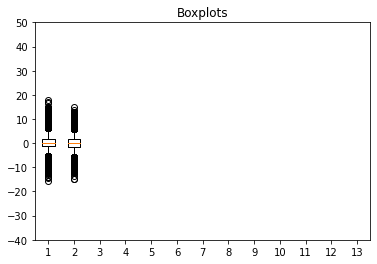

In [29]:
def boxplot(train_df):
#visualizing how the data are scatter
    plt.boxplot(train_df[list(train_df.columns[5:18])])
    plt.title("Boxplots")
    plt.ylim(-40,50)
    plt.show()
boxplot(train_df)

The boxplots show high sparsity of the data so we need to standardize the data and then deal with outliers.

### Standardization

In [28]:
x_train

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,Place_ID_YAQHNNY,Place_ID_YAXBMZ6,Place_ID_YCXA4V5,Place_ID_YDW4K0H,Place_ID_YJENTFL,Place_ID_YLLOKEY,Place_ID_YLZOBFW,Place_ID_YPXSK14,Place_ID_YSIXKFZ,Place_ID_YWSFY6Q
Place_ID X Date,,,,,,,,,,,,,,,,,,,,,
JABMGKI X 2020-02-25,16.414286,54.799999,0.006985,17.620460,1.634477,-0.361916,0.000171,0.000281,-1.637422,0.048849,...,0,0,0,0,0,0,0,0,0,0
05EC30X X 2020-03-07,15.987500,39.475002,0.005367,16.603235,-2.780337,-3.413855,0.000080,0.000208,-1.347761,0.025218,...,0,0,0,0,0,0,0,0,0,0
QU0HBVG X 2020-01-14,15.114286,59.585715,0.008075,17.961093,-1.782789,1.491534,0.000097,0.000163,-1.612315,0.036022,...,0,0,0,0,0,0,0,0,0,0
DALZSBE X 2020-03-30,14.111111,62.422223,0.004304,8.252429,8.031460,1.268438,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3MXSVYJ X 2020-03-27,10.300000,70.599998,0.003690,4.711847,-3.237522,-2.876772,0.000097,0.000137,-1.967822,0.247011,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGVKSLX X 2020-02-20,9.340839,67.133336,0.004010,6.390588,-0.715093,-1.330859,0.000068,0.000153,-1.481150,0.074647,...,0,0,0,0,0,0,0,0,0,0
PJ8AOXN X 2020-02-21,13.381818,75.909092,0.003841,4.013000,1.069520,8.177506,0.000063,0.000158,-1.768678,0.115210,...,0,0,0,0,0,0,0,0,0,0
HCGAOBY X 2020-01-05,9.511948,32.400002,0.003920,16.931879,0.714001,1.619468,0.000069,0.000141,-1.048729,0.013448,...,0,0,0,0,0,0,0,0,0,0


### Removing outliers

In [18]:
# def remove_outliers(train_df):
# #computing quartiles
#     quartiles=train_df.quantile([0.25,0.5, 0.75], interpolation='nearest')
# # replacing outliers by the mean
#     for var in quartiles.columns:
#         for val in train_df[var].values:
#             if val< quartiles[var].values[0]-(1.5* quartiles[var].values[1]) or val> quartiles[var].values[2]+(1.5* quartiles[var].values[1]):
#                  train_df=train_df[train_df[var]!=val]#train_df[var] = train_df[var].replace(to_replace=val, value=train_df[var].median()) # replacing outlier value by the median
#     return train_df
# train_df=remove_outliers(train_df)

##### Outliers are considered as value less than the first quartile minus 1.5 multiplying by the second quartile or values than the third quartile plus 1.5 multiplying by the second quartile
##### After filtered out those outliers, we replaced them using the median

### Modelling

In [103]:
def spli_data(train_df):
# split the data in target variable and other variables
    y = train_df['target']
    X = train_df.loc[:, train_df.columns != 'target']
#converting continue output variable to categorical
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(y)
# split the data in train and test to start training the models
    x_train, x_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)
    return x_train, x_test, y_train,y_test
x_train, x_test, y_train,y_test= spli_data(train_df)

### Standardization

In [104]:
import numpy as np
# Normalizing the data
def standardization_test(x_test):
    #x_test=np.log(x_test)
    (x_test[x_test.columns[:68]]-x_test[x_test.columns[:68]].mean())/x_test[x_test.columns[:68]].std()
    return x_test
x_test=standardization_test(x_test)

In [105]:
# Normalizing the data
def standardization_train(x_train):
    #x_train=np.log(x_train)
    (x_train[x_train.columns[:68]]-x_train[x_train.columns[:68]].mean())/x_train[x_train.columns[:68]].std()
    return x_train
x_train=standardization_train(x_train)

In [47]:
# from sklearn.decomposition import PCA
# import numpy as np
# x_train_after_pca= PCA(20).fit_transform(x_train)
# x_test_after_pca= PCA(20).fit_transform(x_test)

#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');

### 

### Ordinary Least Square Model (OLS)

In [48]:
#def ordinary_least_sq(y_train,x_train,x_test,y_test):
OLS = sm.OLS(y_train,x_train_after_pca).fit()
y_train_pred=OLS.predict(x_train_after_pca)
y_test_pred=OLS.predict(x_test_after_pca)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))
#ordinary_least_sq(y_train,x_train,x_test,y_test)

 RMSE for train:112.34366740544586
RMSE for test :119.40537012705197


### Support Verctor Regression (SVR)

##### SVR with non linear kernel

In [ ]:
# from sklearn.model_selection import GridSearchCV
#Create a dictionary of possible parameters
# params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#           'gamma': [0.0001, 0.001, 0.01, 0.1],
#           'kernel':['linear','rbf','poly'] }

# #Create the GridSearchCV object
# grid_clf = GridSearchCV(SVC(class_weight='balanced'), params_grid)

# #Fit the data with the best possible parameters
# grid_clf = clf.fit(X_train, y_train)

# #Print the best estimator with it's parameters
# print (grid_clf.best_estimators)
#grid.best_estimator_.steps[-1][1].coef_

In [106]:
test_df=pd.read_csv("test.csv")

In [107]:
def test_cleaning(test_df):
    test_df=set_index(test_df)  # this function set index
    test_df=missing_value(test_df) # this function removes missing data and irelevant features
    test_df=standardization_test(test_df) # this function standardizes the data
    for variab in test_df.columns:
        test_df[variab]= test_df[variab].fillna(test_df[variab].mean())
   # test_df=remove_outliers(test_df) # remove outliers
    test_df.to_csv('test_df.csv')
    return test_df
test_df=test_cleaning(test_df)    

Date                                     0.00000
Place_ID                                 0.00000
precipitable_water_entire_atmosphere     0.00000
relative_humidity_2m_above_ground        0.00000
specific_humidity_2m_above_ground        0.00000
                                          ...   
L3_CH4_aerosol_optical_depth            80.69534
L3_CH4_sensor_azimuth_angle             80.69534
L3_CH4_sensor_zenith_angle              80.69534
L3_CH4_solar_azimuth_angle              80.69534
L3_CH4_solar_zenith_angle               80.69534
Length: 76, dtype: float64
Number of variables with more than 80% of missing values =7
Those variables are: ['L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth', 'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle', 'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle']
The percentage of the remaining missing data is:7.684060485870104


In [108]:
for col in x_train.columns:
    if col not in test_df.columns:
        test_df[col]=test_df[col].fill(0)
#return test_df

for cols in test_df.columns:
    if col not in x_train.columns:
        x_train[cols]=x_train[cols].fill(0)
        #return x_train

In [109]:
x_train.shape,test_df.shape

((24445, 161), (16136, 161))

In [111]:
from sklearn import svm

#def support_vector_reg_non_linear_kernel(y_train,x_train,x_test,y_test):
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1).fit(x_train, y_train)
y_train_pred=svr_rbf.predict(x_train)
y_test_pred=svr_rbf.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))
#support_vector_reg_non_linear_kernel(y_train,x_train,x_test,y_test)

 RMSE for train:10.043946154741503
RMSE for test :54.86407661303685


##### SVR with linear kernel

In [64]:
svr_lin = SVR(kernel="linear", C=100, gamma=0.1).fit(x_train, y_train)
y_train_pred=svr_lin.predict(x_train)
y_test_pred=svr_lin.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:38.52297194766471
RMSE for test :39.534537454543155


##### SVR with polynomial kernel

In [104]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(x_train, y_train)
y_train_pred=svr_poly.predict(x_train)
y_test_pred=svr_poly.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:26.65559792477131
RMSE for test :34.98462237936396


### Decision Tree Regression

In [115]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0).fit(x_train, y_train)
y_train_pred=regressor.predict(x_train)
y_test_pred=regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:0.0
RMSE for test :48.08765265730914


### Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
y_train_pred=regressor_forest.predict(x_train)
y_test_pred=regressor_forest.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:12.722555453658893
RMSE for test :34.2937199700589


### K-Nearest Neighbors (KNN)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
regressor_neighbor = KNeighborsRegressor().fit(x_train, y_train)
y_train_pred=regressor_neighbor.predict(x_train)
y_test_pred=regressor_neighbor.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:29.046134711540546
RMSE for test :36.46197092615782


In [64]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor().fit(x_train, y_train)
y_train_pred=gradient.predict(x_train)
y_test_pred=gradient.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:31.97663938340356
RMSE for test :34.83703291399464


### Validating the model using the test data

In [41]:
#test_df=pd.read_csv("test.csv")
test_df.head(n=2)

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,Place_ID_Y52UFLS,Place_ID_YBSLUIZ,Place_ID_YJDNZNX,Place_ID_YJNLXFF,Place_ID_YTSD0FF,Place_ID_YY9I2R1,Place_ID_YYOM5TU,Place_ID_Z2XYMS4,Place_ID_ZIESWTR,Place_ID_ZZDJZMS
Place_ID X Date,,,,,,,,,,,,,,,,,,,,,
0OS9LVX X 2020-01-02,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,...,0,0,0,0,0,0,0,0,0,0
0OS9LVX X 2020-01-03,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,...,0,0,0,0,0,0,0,0,0,0


In [108]:
test_df[test_df["Place_ID X Date"]=="0OS9LVX X 2020-01-22"]

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
20,0OS9LVX X 2020-01-22,2020-01-22,0OS9LVX,21.4,27.0,0.00439,17.44964,6.772317,-0.331833,0.000051,...,41.656537,-89.431235,27.562707,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cleaning the test data

In [36]:
#test_df.to_csv('test_df.csv')
test_df=pd.read_csv("test_df.csv")
test_df=set_index(test_df) 
test_df

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,Place_ID_Y52UFLS,Place_ID_YBSLUIZ,Place_ID_YJDNZNX,Place_ID_YJNLXFF,Place_ID_YTSD0FF,Place_ID_YY9I2R1,Place_ID_YYOM5TU,Place_ID_Z2XYMS4,Place_ID_ZIESWTR,Place_ID_ZZDJZMS
Place_ID X Date,,,,,,,,,,,,,,,,,,,,,
0OS9LVX X 2020-01-02,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,...,0,0,0,0,0,0,0,0,0,0
0OS9LVX X 2020-01-03,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,...,0,0,0,0,0,0,0,0,0,0
0OS9LVX X 2020-01-04,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,...,0,0,0,0,0,0,0,0,0,0
0OS9LVX X 2020-01-05,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,-0.268490,0.088795,...,0,0,0,0,0,0,0,0,0,0
0OS9LVX X 2020-01-06,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,0.460720,0.041197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZDJZMS X 2020-03-31,9.400001,86.200005,0.00413,3.136346,0.073416,0.923135,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
ZZDJZMS X 2020-04-01,17.000000,90.300003,0.00548,6.394495,-1.217649,1.270308,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
ZZDJZMS X 2020-04-02,19.170641,86.200005,0.00656,9.750879,-0.410603,0.754363,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [14]:
test_df = test_df.fillna(test_df.mean())
#test_df[test_df.index=="0OS9LVX X 2020-01-22"]
#test_df.dropna(axis=0,inplace=True)

### Prediction

In [65]:
# prediction using ordinary least square
test_pred = regressor_forest.predict(test_df)
# create our new two variables
test_df['target'] = test_pred
predictions=test_df['target']
predictions=pd.DataFrame(predictions)
#predictions = predictions.fillna(df.median())
predictions.to_csv('predictions.csv')
predictions

,target
Place_ID X Date,
0OS9LVX X 2020-01-02,83.71
0OS9LVX X 2020-01-03,77.79
0OS9LVX X 2020-01-04,73.95
0OS9LVX X 2020-01-05,69.59
0OS9LVX X 2020-01-06,74.94
...,...
ZZDJZMS X 2020-03-31,107.78
ZZDJZMS X 2020-04-01,103.89
ZZDJZMS X 2020-04-02,86.62


In [44]:
predictions["target"].mean()

102.39148429847701

In [64]:
test_df.drop("target",axis=1,inplace=True)

In [77]:
df=pd.read_csv("predictions.csv")
df.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,3.606870e+08
1,0OS9LVX X 2020-01-03,3.601335e+08
2,0OS9LVX X 2020-01-04,3.598568e+08
3,0OS9LVX X 2020-01-05,3.597184e+08
4,0OS9LVX X 2020-01-06,3.596492e+08


In [78]:
df[df["Place_ID X Date"]=="0OS9LVX X 2020-01-22"]

,Place_ID X Date,target
20,0OS9LVX X 2020-01-22,3.595801e+08
